In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [14]:
img1 = cv2.imread('left_img.jpeg')
img1_gray = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)

In [15]:
img2 = cv2.imread('right_img.jpeg')
img2_gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

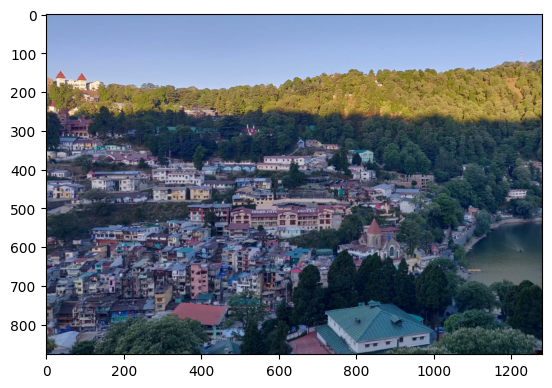

In [16]:
plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))
plt.show()

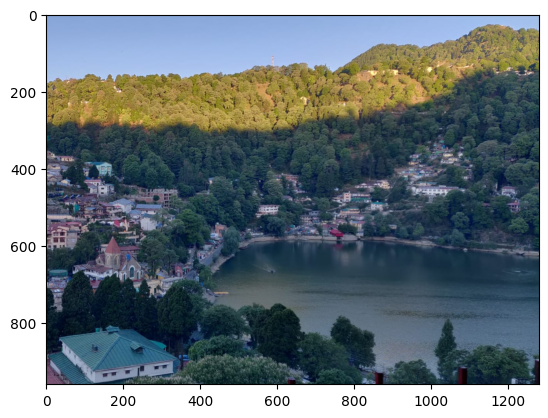

In [17]:
plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))
plt.show()

In [18]:
def getMatches(img1,img2): #Detecting the keypoints and descriptors of both the images and then using knnMatch to find the matches
    sift = cv2.SIFT_create()
    img1_kp,img1_features = sift.detectAndCompute(img1,None)
    img2_kp,img2_features = sift.detectAndCompute(img2,None)

    bf = cv2.BFMatcher()
    initial_matches = bf.knnMatch(img1_features,img2_features,k=2)

    final_matches = []
    matches=[]
    for i,j in initial_matches:
        if i.distance <= 0.75* j.distance:
            final_matches.append([i])
            matches.append(i)
        
    return final_matches,img1_kp,img2_kp,matches

In [19]:
matches,img1_kp,img2_kp,match = getMatches(img1_gray,img2_gray)

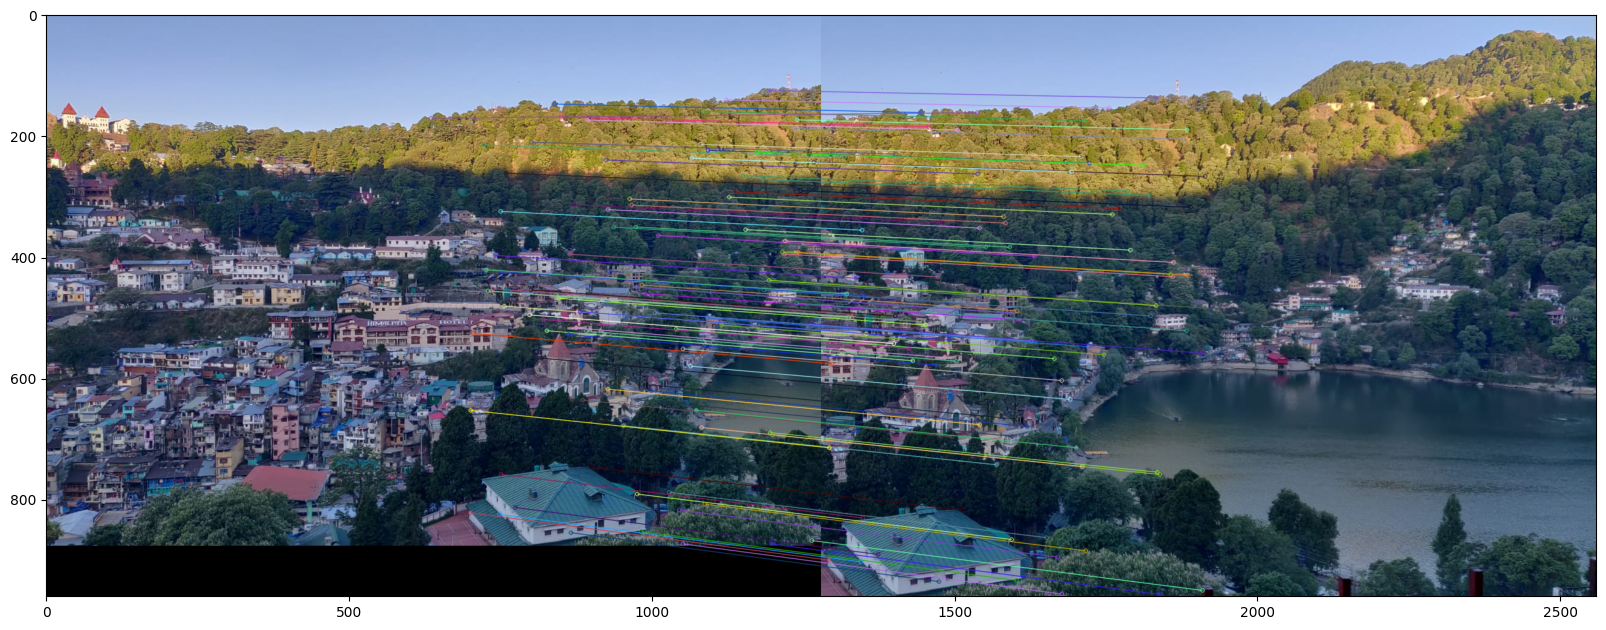

True

In [20]:
img3 = cv2.drawMatches(img1,img1_kp,img2,img2_kp,np.random.choice(match,100),
                    None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(20,15))
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
plt.show()
cv2.imwrite("matches.png", img3)

In [21]:
def FindHomography(matches, img1_kp, img2_kp): #Function to find the homographymatrix

    if len(matches)>=4:
        img1_points = []
        img2_points = []
        for match in matches:
            img1_points.append(img1_kp[match[0].queryIdx].pt)
            img2_points.append(img2_kp[match[0].trainIdx].pt)

        img1_points = np.float32(img1_points)
        img2_points = np.float32(img2_points)

        (H, status) = cv2.findHomography(img2_points, img1_points, cv2.RANSAC, 4.0)

        return H, status
    else:
        return None

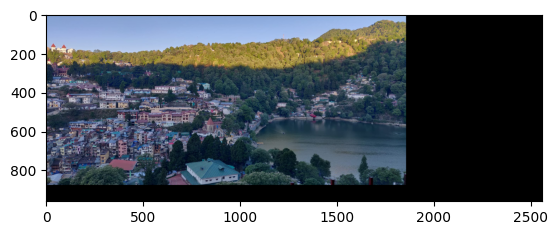

True

In [22]:
H, status = FindHomography(matches, img1_kp, img2_kp)
StitchedImage=cv2.warpPerspective(img2, H, (img2.shape[1]+img1.shape[1], img2.shape[0])) #Warping the second image to stitch it with the first image
StitchedImage[0:img1.shape[0],0:img1.shape[1]]=img1 #Stitching the images
plt.imshow(cv2.cvtColor(StitchedImage,cv2.COLOR_BGR2RGB))
plt.show()
cv2.imwrite("uncropped.png", StitchedImage)

In [23]:
def crop(image): #Cropping the unwanted black portion caused as a result of stitching the images
    y_nonzero, x_nonzero, _ = np.nonzero(image)
    return image[np.min(y_nonzero):np.max(y_nonzero), np.min(x_nonzero):np.max(x_nonzero)]

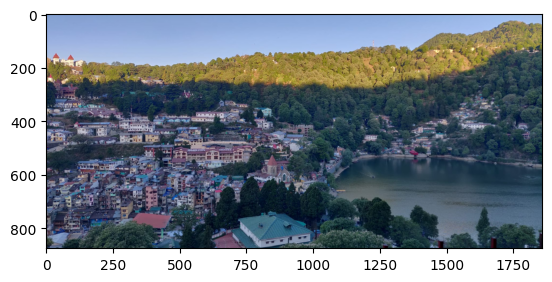

True

In [24]:
StitchedImage=crop(StitchedImage)
plt.imshow(cv2.cvtColor(StitchedImage,cv2.COLOR_BGR2RGB))
plt.show()
cv2.imwrite("result.png", StitchedImage)